# Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(9, 6))

## References
Official Pandas documentation on time series: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html <br>
Chapter on time series in Wes McKinneys book: https://github.com/wesm/pydata-book/blob/2nd-edition/ch11.ipynb
    

## Get data as time series
You can specify the columns that contains the date or time and set it as index.

In [2]:
fileStore = "../ZZ_Data/Kaggle_Rossmann/store.csv"
fileTrain = "../ZZ_Data/Kaggle_Rossmann/train.csv"
fileTest = "../ZZ_Data/Kaggle_Rossmann/test.csv"

In [3]:
### Read specified columns and a specified number of rows, and set the date column as index of the time series
colsIwannaUse = ["Store", "Date", "Customers", "Sales"]
df = pd.read_csv(fileTrain, parse_dates=["Date"], usecols = colsIwannaUse, nrows=10000000,  index_col='Date') 
#df[10:10000:1000]

In [4]:
### Sort the timeseries from oldest to newest data
df = df.sort_values(by='Date', ascending=True)
df.tail()

,Store,Sales,Customers
Date,,,
2015-07-31,746,9082,638
2015-07-31,747,10708,826
2015-07-31,748,7481,578
2015-07-31,742,10460,1016
2015-07-31,1,5263,555


In [5]:
#df.plot(logy=True)

## Investigating parts of the data

In [6]:
### The first rows of a specified date
df.loc["2014-12-01"].head()

,Store,Sales,Customers
Date,,,
2014-12-01,371,11572,815
2014-12-01,372,14140,995
2014-12-01,373,5712,358
2014-12-01,374,11092,1127
2014-12-01,376,12472,1273


In [7]:
### Get the data of each year only
df2014 = df.truncate(before='2014-01-1', after='2014-12-31', copy=True)
#df2014

## Resample

In [8]:
dfY = df.resample('Y').mean()
dfY

,Store,Sales,Customers
Date,,,
2013-12-31,557.998943,5658.533675,629.043686
2014-12-31,559.170379,5833.290704,643.268034
2015-12-31,558.000000,5878.245380,624.199843


In [9]:
dfD = df.resample('D').mean()
#dfD.head()

In [10]:
dfW = df.resample('W').mean()
#dfW.head()

In [11]:
df2014 = df2014.resample('M').mean()
print("Minimum:\n", df2014.min())
print("Average:\n", df2014.mean())
print("Maximum:\n", df2014.max())      

Minimum:
 Store         558.000000
Sales        5431.875799
Customers     604.460784
dtype: float64
Average:
 Store         559.271658
Sales        5850.786695
Customers     645.145753
dtype: float64
Maximum:
 Store         560.543316
Sales        6973.282456
Customers     717.634087
dtype: float64


In [12]:
dfM2014Sales = df2014["Sales"].resample('M').sum()
print(dfM2014Sales.min(),dfM2014Sales.mean(),dfM2014Sales.max())

5431.875799218863 5850.786694744208 6973.2824564429875


# Some Plots

In [13]:
#dfM2014Sales.plot()

In [18]:
### Daily Customers (do not significantly change in number over this time )
#dfD.Customers.plot()
#dfD.Customers.rolling(90).mean().plot()

<AxesSubplot:xlabel='Date'>

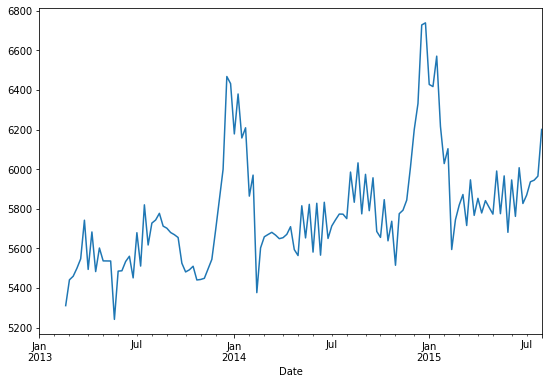

In [15]:
# Sales has an increasing trend over this time with peaks in each December
#dfW.Sales.rolling(2).max().plot()
dfW.Sales.rolling(8).mean().plot()
#dfW.Sales.rolling(2).min().plot()

In [19]:
### Example for a bar chart
dfM = df.resample('M').mean()
dfM['Month'] = dfM.index.strftime("%B")
dfM = dfM.set_index("Month")
#dfM.Sales.plot.bar()